In [ ]:
# DisulfideBond Class Analysis Dictionary creation
# Author: Eric G. Suchanek, PhD.
# (c) 2023 Eric G. Suchanek, PhD., All Rights Reserved
# License: MIT
# Last Modification: 2/18/23
# Cα Cβ Sγ

import pandas as pd
import numpy as np

import pyvista as pv
from pyvista import set_plot_theme

import proteusPy
from proteusPy import *
from proteusPy.Disulfide import *
from proteusPy.DisulfideList import DisulfideList
from proteusPy.utility import print_memory_used

# pyvista setup for notebooks
pv.set_jupyter_backend('trame')
#set_plot_theme('dark')

print_memory_used()

PDB_SS = Load_PDB_SS(verbose=True, subset=False)
PDB_SS.describe()
print_memory_used()


In [ ]:
# the average structures for each class, returned as a 
# list of disulfides
cons_list = PDB_SS.tclass.load_consensus_file()

In [ ]:
PDB_SS.plot_classes_vs_cutoff(.5, 50)

In [ ]:
sixclass_df = PDB_SS.tclass.sixclass_df.copy()
sixclass_df.sort_values(by='percentage', ascending=False, inplace=True)
sixclass_df.head(40)


In [ ]:
clslist = PDB_SS.extract_class('15554')
#clslist

In [ ]:
combo = PDB_SS.tclass.binary_to_six_class('00002')

In [ ]:
len(combo)

In [ ]:
combo

# Disulfide Binary Class Breakdown

|   class_id | SS_Classname   | FXN        |   count |   incidence |
|-----------:|:---------------|:-----------|--------:|------------:|
|      00000 | -LHSpiral      | UNK        |   31513 |  0.261092   |
|      00002 | 00002          | UNK        |    5805 |  0.0480956  |
|      00020 | -LHHook        | UNK        |    3413 |  0.0282774  |
|      00022 | 00022          | UNK        |    1940 |  0.0160733  |
|      00200 | -RHStaple      | Allosteric |   12735 |  0.105512   |
|      00202 | 00202          | UNK        |     993 |  0.00822721 |
|      00220 | 00220          | UNK        |    5674 |  0.0470103  |
|      00222 | 00222          | UNK        |    5092 |  0.0421883  |
|      02000 | 02000          | UNK        |    4749 |  0.0393465  |
|      02002 | 02002          | UNK        |    3774 |  0.0312684  |
|      02020 | -LHStaple      | UNK        |    1494 |  0.0123781  |
|      02022 | 02022          | UNK        |     591 |  0.00489656 |
|      02200 | -RHHook        | UNK        |    5090 |  0.0421717  |
|      02202 | 02202          | UNK        |     533 |  0.00441602 |
|      02220 | -RHSpiral      | UNK        |    6751 |  0.0559335  |
|      02222 | 02222          | UNK        |    3474 |  0.0287828  |
|      20000 | ±LHSpiral      | UNK        |    3847 |  0.0318732  |
|      20002 | +LHSpiral      | UNK        |     875 |  0.00724956 |
|      20020 | ±LHHook        | UNK        |     803 |  0.00665302 |
|      20022 | +LHHook        | UNK        |     602 |  0.0049877  |
|      20200 | ±RHStaple      | UNK        |     419 |  0.0034715  |
|      20202 | +RHStaple      | UNK        |     293 |  0.00242757 |
|      20220 | ±RHHook        | Catalytic  |    1435 |  0.0118893  |
|      20222 | 20222          | UNK        |     488 |  0.00404318 |
|      22000 | -/+LHHook      | UNK        |    2455 |  0.0203402  |
|      22002 | 22002          | UNK        |    1027 |  0.00850891 |
|      22020 | ±LHStaple      | UNK        |    1046 |  0.00866633 |
|      22022 | +LHStaple      | UNK        |     300 |  0.00248556 |
|      22200 | -/+RHHook      | UNK        |    6684 |  0.0553783  |
|      22202 | +RHHook        | UNK        |     593 |  0.00491313 |
|      22220 | ±RHSpiral      | UNK        |    2544 |  0.0210776  |
|      22222 | +RHSpiral      | UNK        |    3665 |  0.0303653  |


In [13]:
# Remapping binary classes into six-space
# the tclass.binary_to_six_classes() function returns
# all possible combinations as a list of sextant-based
# strings. These variable names correspond to the names given by
# Hogg et al.

# most prevelent
LHSpiral_neg = PDB_SS.tclass.binary_to_six_class("00000")
RHSpiral_neg = PDB_SS.tclass.binary_to_six_class("02220")

LHSpiral_pminus = PDB_SS.tclass.binary_to_six_class("20000")
LHSpiral_plus = PDB_SS.tclass.binary_to_six_class("20002")

LHHook_neg = PDB_SS.tclass.binary_to_six_class("00020")
LHHook_pminus = PDB_SS.tclass.binary_to_six_class("20020")
LHHook_plus = PDB_SS.tclass.binary_to_six_class("20022")
LHHook_minus_plus = PDB_SS.tclass.binary_to_six_class("22000")

# Catalytic
RHHook_pminus = PDB_SS.tclass.binary_to_six_class("20220")

RHHook_minus = PDB_SS.tclass.binary_to_six_class("02200")

# Allosteric
RHStaple_neg = PDB_SS.tclass.binary_to_six_class("00200")

RHStaple_pminus = PDB_SS.tclass.binary_to_six_class("20200")
RHStaple_plus = PDB_SS.tclass.binary_to_six_class("20202")

LHStaple_neg = PDB_SS.tclass.binary_to_six_class("02020")
LHStaple_pminus = PDB_SS.tclass.binary_to_six_class("22020")
LHStaple_plus = PDB_SS.tclass.binary_to_six_class("22022")

RHSpiral_pminus = PDB_SS.tclass.binary_to_six_class("22220")
RHSpiral_pminus = PDB_SS.tclass.binary_to_six_class("22220")



In [ ]:
RHHook_pminus

In [24]:
# RHHook_pminus is considered to be 'catalytic', so we can
# look more closely in six-space by examining the number of disulfides within
# each of the possible six-space strings computed above:
# For each six-class ID in the combo list, return the sslist represented by
# that class and calculate the number of SS in it. 
# Plot the results.

# catalytic RHHook_pminus
def enumerate_sixclass_fromlist(sslist):
    x = []
    y = []

    for sixcls in sslist:
        if sixcls is not None:
            _y = PDB_SS.tclass.sslist_from_classid(sixcls)
            # it's possible to have 0 SS in a class
            if _y is not None:
                # only append if we have both.
                x.append(sixcls)
                y.append(len(_y))

    sslist_df = pd.DataFrame(columns=['cls', 'count'])
    sslist_df['cls'] = x
    sslist_df['count'] = y
    return(sslist_df)
    



In [25]:
df = enumerate_sixclass_fromlist(RHHook_pminus)

<AxesSubplot: >

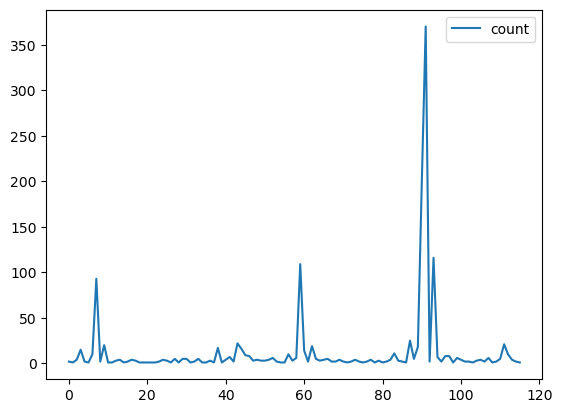

In [26]:
df.plot()